<a href="https://colab.research.google.com/github/sarthak-gupta29/ML-Lab-Eval---Sarthak-Gupta-102203902-/blob/main/Sarthak_102203902_ML_LabEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install --upgrade pycaret

In [2]:
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv


In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'], errors='ignore')
y = data['Target3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)

print(f"Training Features: {X_train.shape}")
print(f"Testing Features: {X_test.shape}")
print(f"Training Labels: {y_train.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Features: (700, 15)
Testing Features: (300, 15)
Training Labels: (700,)
Testing Labels: (300,)


In [5]:
from pycaret.regression import setup

regression_setup = setup(
    data=train_data,
    target='Target3',
    session_id=42,
    html=False
)


                    Description             Value
0                    Session id                42
1                        Target           Target3
2                   Target type        Regression
3           Original data shape         (700, 16)
4        Transformed data shape         (700, 16)
5   Transformed train set shape         (489, 16)
6    Transformed test set shape         (211, 16)
7              Numeric features                15
8                    Preprocess              True
9               Imputation type            simple
10           Numeric imputation              mean
11       Categorical imputation              mode
12               Fold Generator             KFold
13                  Fold Number                10
14                     CPU Jobs                -1
15                      Use GPU             False
16               Log Experiment             False
17              Experiment Name  reg-default-name
18                          USI              7323


In [7]:
from pycaret.regression import compare_models, tune_model, create_model, save_model

best_model = compare_models()

tuned_model = tune_model(best_model)

required_models = {
    'Linear Regression': 'lr',
    'Support Vector Regression': 'svm',
    'Random Forest Regressor': 'rf',
    'Decision Tree': 'dt',
    'K-Nearest Neighbors': 'knn'
}

saved_models = {}
for title, model_name in required_models.items():
    model = create_model(model_name)
    save_model(model, f"{model_name}_model")
    saved_models[title] = f"{model_name}_model"

save_model(tuned_model, "tuned_best_model")


Processing: 100%|██████████| 81/81 [00:40<00:00,  1.66it/s]
                                                           

                                    Model     MAE      MSE    RMSE      R2  \
br                         Bayesian Ridge  4.0460  23.2634  4.8147  0.1982   
lasso                    Lasso Regression  4.0468  23.2638  4.8148  0.1979   
llar         Lasso Least Angle Regression  4.0468  23.2638  4.8148  0.1979   
en                            Elastic Net  4.0494  23.2722  4.8156  0.1978   
ridge                    Ridge Regression  4.0530  23.3760  4.8273  0.1933   
lr                      Linear Regression  4.0551  23.3995  4.8297  0.1924   
lar                Least Angle Regression  4.0551  23.3995  4.8297  0.1924   
ada                    AdaBoost Regressor  4.0586  23.4634  4.8362  0.1910   
et                  Extra Trees Regressor  4.0869  23.8741  4.8777  0.1769   
rf                Random Forest Regressor  4.0942  23.8385  4.8761  0.1763   
omp           Orthogonal Matching Pursuit  4.3021  26.6228  5.1516  0.0834   
gbr           Gradient Boosting Regressor  4.2743  26.6353  5.15


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits



Processing:  86%|████████▌ | 6/7 [00:01<00:00,  3.83it/s]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     4.0190  21.4658  4.6331  0.1115  0.0679  0.0601
1     4.3695  25.2483  5.0248  0.0972  0.0733  0.0644
2     4.3606  26.3770  5.1359  0.1877  0.0743  0.0637
3     3.9714  23.7249  4.8708  0.2714  0.0704  0.0585
4     4.5359  28.7936  5.3660  0.3496  0.0791  0.0678
5     3.6275  20.3534  4.5115  0.3933  0.0649  0.0528
6     3.6917  20.6732  4.5468  0.1679  0.0666  0.0551
7     3.9837  22.4308  4.7361  0.1673  0.0697  0.0603
8     4.0105  22.5121  4.7447  0.1186  0.0677  0.0575
9     3.8170  20.4171  4.5185  0.1365  0.0672  0.0581
Mean  4.0387  23.1996  4.8088  0.2001  0.0701  0.0598
Std   0.2842   2.6862  0.2738  0.0980  0.0041  0.0043



Processing:  75%|███████▌  | 3/4 [00:00<00:00, 15.00it/s]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.9846  21.6021  4.6478  0.1059  0.0680  0.0594
1     4.3517  25.1441  5.0144  0.1009  0.0733  0.0643
2     4.3910  26.8787  5.1845  0.1722  0.0751  0.0643
3     3.9432  23.4812  4.8457  0.2789  0.0702  0.0582
4     4.5510  28.9115  5.3769  0.3469  0.0792  0.0680
5     3.6492  20.2943  4.5049  0.3950  0.0648  0.0531
6     3.7251  20.8389  4.5650  0.1612  0.0670  0.0556
7     4.0296  22.6690  4.7612  0.1585  0.0699  0.0608
8     4.0500  23.2473  4.8215  0.0898  0.0688  0.0581
9     3.8755  20.9279  4.5747  0.1149  0.0679  0.0589
Mean  4.0551  23.3995  4.8297  0.1924  0.0704  0.0601
Std   0.2776   2.6764  0.2717  0.1036  0.0041  0.0042
Transformation Pipeline and Model Successfully Saved



Processing:  75%|███████▌  | 3/4 [00:00<00:00,  9.28it/s]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.9836  25.1327  5.0133 -0.0403  0.0742  0.0605
1     4.2461  24.0551  4.9046  0.1398  0.0719  0.0629
2     4.6871  29.7168  5.4513  0.0848  0.0789  0.0688
3     4.1767  26.7323  5.1703  0.1791  0.0749  0.0615
4     4.9203  35.0276  5.9184  0.2088  0.0875  0.0743
5     4.1160  26.5394  5.1516  0.2089  0.0749  0.0608
6     4.1163  24.9041  4.9904 -0.0024  0.0734  0.0620
7     4.3992  28.0588  5.2971 -0.0416  0.0783  0.0669
8     4.2796  24.1208  4.9113  0.0556  0.0703  0.0616
9     4.2675  24.4071  4.9404 -0.0322  0.0732  0.0647
Mean  4.3192  26.8695  5.1749  0.0761  0.0757  0.0644
Std   0.2698   3.2346  0.3004  0.0978  0.0046  0.0042
Transformation Pipeline and Model Successfully Saved



Processing: 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.8649  20.8535  4.5666  0.1369  0.0668  0.0577
1     4.1120  22.8368  4.7788  0.1834  0.0698  0.0608
2     4.3207  25.4960  5.0494  0.2148  0.0732  0.0635
3     4.0244  23.1606  4.8125  0.2887  0.0697  0.0593
4     4.5942  29.9499  5.4727  0.3235  0.0802  0.0684
5     3.8017  22.1502  4.7064  0.3397  0.0674  0.0553
6     4.1709  24.9448  4.9945 -0.0040  0.0731  0.0624
7     4.0803  24.9120  4.9912  0.0752  0.0734  0.0618
8     3.9438  21.8812  4.6777  0.1433  0.0664  0.0563
9     4.0291  22.2001  4.7117  0.0611  0.0694  0.0609
Mean  4.0942  23.8385  4.8761  0.1763  0.0709  0.0606
Std   0.2185   2.4942  0.2485  0.1101  0.0040  0.0036
Transformation Pipeline and Model Successfully Saved



Processing:  75%|███████▌  | 3/4 [00:00<00:00,  7.17it/s]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     5.2265  42.4459  6.5151 -0.7568  0.0960  0.0782
1     5.6776  48.7445  6.9817 -0.7430  0.1029  0.0837
2     4.9571  39.8227  6.3105 -0.2264  0.0909  0.0723
3     4.9204  36.7276  6.0603 -0.1279  0.0863  0.0714
4     5.4816  47.1233  6.8646 -0.0645  0.1002  0.0822
5     5.9796  56.2294  7.4986 -0.6762  0.1095  0.0863
6     5.7490  51.0635  7.1459 -1.0553  0.1057  0.0856
7     5.4612  40.5106  6.3648 -0.5038  0.0929  0.0816
8     5.9490  48.8320  6.9880 -0.9118  0.1006  0.0864
9     4.9500  39.2229  6.2628 -0.6588  0.0940  0.0739
Mean  5.4352  45.0722  6.6992 -0.5725  0.0979  0.0802
Std   0.3864   5.9272  0.4387  0.3178  0.0068  0.0055
Transformation Pipeline and Model Successfully Saved



Processing:  75%|███████▌  | 3/4 [00:00<00:00,  6.09it/s]
                                                         

         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     4.6784  29.9328  5.4711 -0.2389  0.0802  0.0701
1     4.7767  32.2370  5.6778 -0.1527  0.0827  0.0704
2     4.6388  30.2018  5.4956  0.0699  0.0793  0.0677
3     4.2473  25.7387  5.0733  0.2096  0.0734  0.0624
4     5.0865  36.7459  6.0618  0.1700  0.0885  0.0755
5     4.3306  32.5597  5.7061  0.0294  0.0829  0.0637
6     3.7829  22.1076  4.7019  0.1102  0.0692  0.0569
7     4.5461  33.4629  5.7847 -0.2422  0.0851  0.0694
8     4.1457  24.3327  4.9328  0.0474  0.0711  0.0596
9     5.1808  37.6299  6.1343 -0.5914  0.0902  0.0773
Mean  4.5414  30.4949  5.5039 -0.0589  0.0803  0.0673
Std   0.4065   4.8727  0.4488  0.2339  0.0067  0.0063
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  BayesianRidge(alpha_1=0.1, alpha_2=0.1, lambda_1=0.0005,
                                lambda_2=0.3))]),
 'tuned_best_model.pkl')

In [8]:
from pycaret.regression import finalize_model, predict_model
final_model = finalize_model(tuned_model)
test_data = pd.concat([X_test, y_test], axis=1)
predictions = predict_model(final_model, data=test_data)
predictions.to_csv('predictions.csv', index=False)

            Model    MAE      MSE    RMSE      R2  RMSLE   MAPE
0  Bayesian Ridge  3.953  22.1265  4.7039  0.2451  0.069  0.059


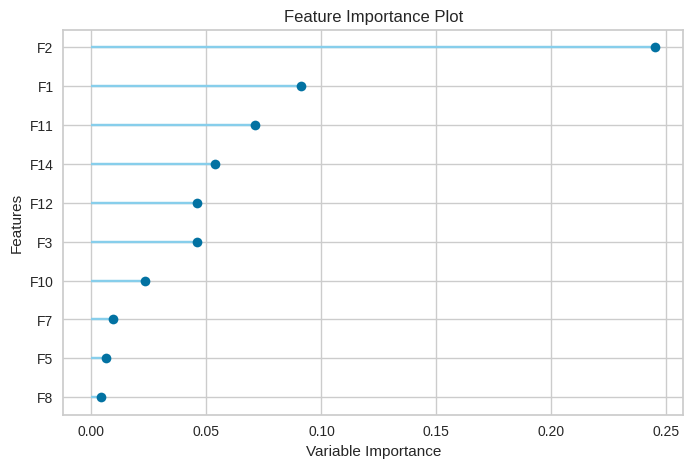

In [9]:
results = pull()
results.to_csv('model_comparison_results.csv', index=False)

plot_model(final_model, plot='feature')

In [10]:
files.download('predictions.csv')
files.download('model_comparison_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Transformation Pipeline and Model Successfully Loaded
            Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Bayesian Ridge  3.9064  21.1032  4.5938  0.2481  0.0669  0.0579


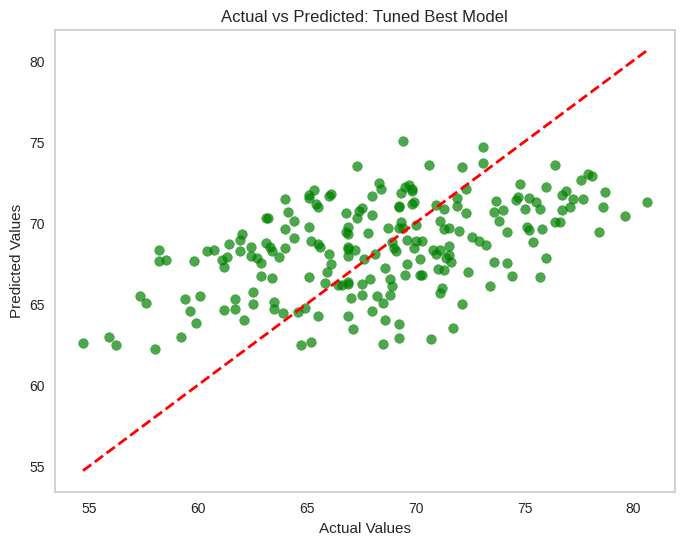

Transformation Pipeline and Model Successfully Loaded
               Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Linear Regression  3.9265  21.4268  4.6289  0.2366  0.0673  0.0581


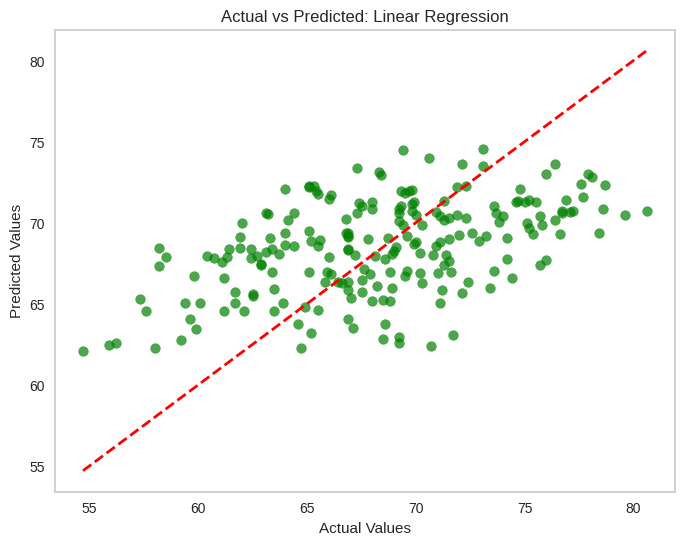

Transformation Pipeline and Model Successfully Loaded
                       Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Support Vector Regression  4.0922  24.2147  4.9208  0.1373  0.0718  0.0608


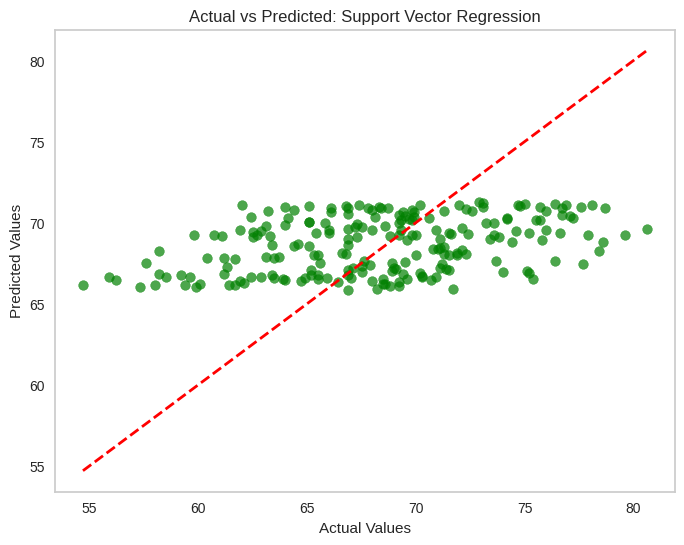

Transformation Pipeline and Model Successfully Loaded
                     Model     MAE      MSE    RMSE      R2  RMSLE    MAPE
0  Random Forest Regressor  4.0825  23.0475  4.8008  0.1789   0.07  0.0605


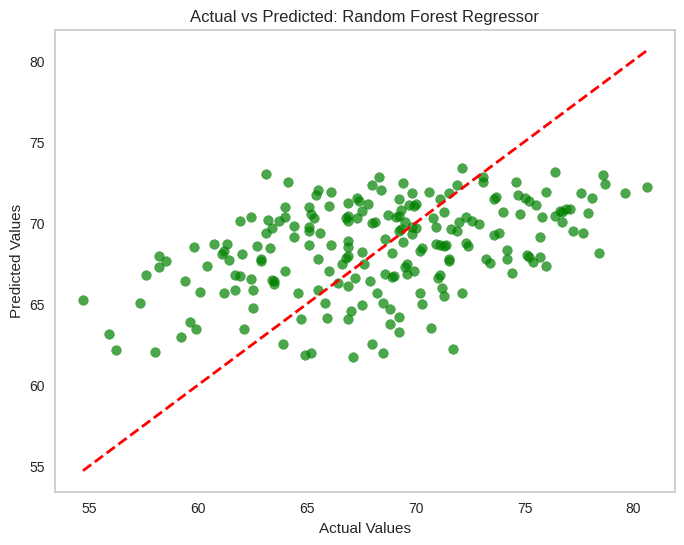

Transformation Pipeline and Model Successfully Loaded
                     Model     MAE      MSE  RMSE     R2   RMSLE   MAPE
0  Decision Tree Regressor  5.7616  48.0246  6.93 -0.711  0.1006  0.085


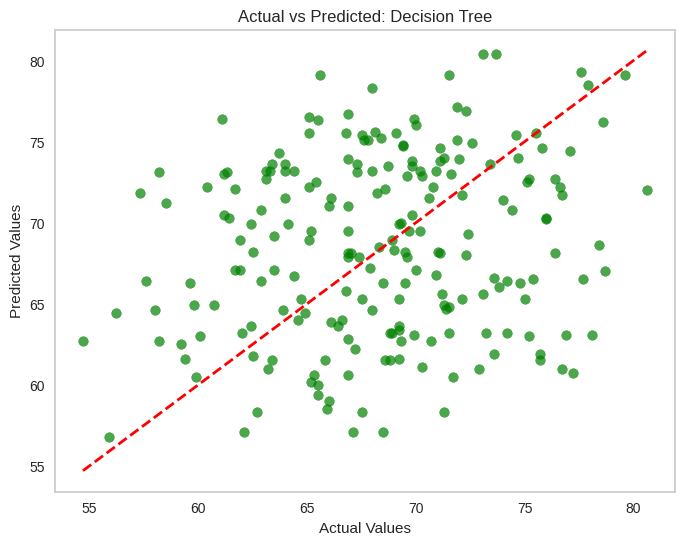

Transformation Pipeline and Model Successfully Loaded
                   Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  K Neighbors Regressor  4.4314  29.8585  5.4643 -0.0638  0.0794  0.0654


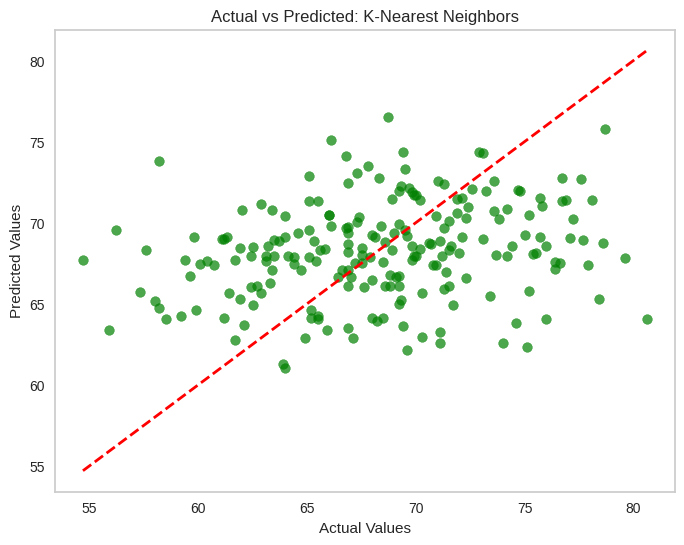

In [12]:
import matplotlib.pyplot as plt
from pycaret.regression import load_model, predict_model

def plot_actual_vs_predicted(saved_model_name, model_title):
    model = load_model(saved_model_name)
    predictions = predict_model(model)
    actual_values = predictions['Target3']
    predicted_values = predictions.iloc[:, -1]

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.7, color='green')
    plt.plot(
        [actual_values.min(), actual_values.max()],
        [actual_values.min(), actual_values.max()],
        color='red',
        linestyle='--',
        linewidth=2
    )
    plt.title(f'Actual vs Predicted: {model_title}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

plot_actual_vs_predicted("tuned_best_model", "Tuned Best Model")

for title, model_name in saved_models.items():
    plot_actual_vs_predicted(model_name, title)